In [1]:
#导入常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
#设置显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 无视警告
import warnings 
# warnings.filterwarnings('always') # 显示所有警告
warnings.filterwarnings('ignore') # 忽略所有警告

In [2]:
# 读取数据
data= pd.read_csv('US-pumpkins.csv')
data

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


# 预处理1-去除无用列

In [3]:
# data.columns

In [4]:
# 创建英文列名到中文列名的映射字典
column_mapping = {'City Name': '城市名称','Type': '类型','Package': '包装','Variety': '品种','Sub Variety': '子品种','Grade': '等级','Date': '日期','Low Price': '最低价格','High Price': '最高价格','Mostly Low': '主要最低价','Mostly High': '主要最高价', 'Origin': '产地','Origin District': '产地区域','Item Size': '物品尺寸','Color': '颜色','Environment': '环境','Unit of Sale': '销售单位','Quality': '质量','Condition': '状况','Appearance': '外观','Storage': '储存','Crop': '作物','Repack': '重新包装','Trans Mode': '运输模式','Unnamed: 24': '未命名: 24','Unnamed: 25': '未命名: 25'}
# 替换DataFrame的列名
data.rename(columns=column_mapping, inplace=True)
# 检查更改后的列名
print(data.columns.tolist())

['城市名称', '类型', '包装', '品种', '子品种', '等级', '日期', '最低价格', '最高价格', '主要最低价', '主要最高价', '产地', '产地区域', '物品尺寸', '颜色', '环境', '销售单位', '质量', '状况', '外观', '储存', '作物', '重新包装', '运输模式', '未命名: 24', '未命名: 25']


*重新包装:南瓜在销售前是否经过重新包装

In [5]:
from datetime import datetime
# 将日期列转换为日期格式
data['日期'] = pd.to_datetime(data['日期'], format='%m/%d/%y')
data["年份"] = data['日期'].dt.year
data["月份"] = data['日期'].dt.month
data["日"] = data['日期'].dt.day
data["星期"] = data['日期'].dt.weekday
data

,城市名称,类型,包装,品种,子品种,等级,日期,最低价格,最高价格,主要最低价,...,储存,作物,重新包装,运输模式,未命名: 24,未命名: 25,年份,月份,日,星期
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,2017-04-29,270.00,280.00,270.0,...,NaN,NaN,E,NaN,NaN,NaN,2017,4,29,5
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,2017-05-06,270.00,280.00,270.0,...,NaN,NaN,E,NaN,NaN,NaN,2017,5,6,5
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,2016-09-24,160.00,160.00,160.0,...,NaN,NaN,N,NaN,NaN,NaN,2016,9,24,5
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,2016-09-24,160.00,160.00,160.0,...,NaN,NaN,N,NaN,NaN,NaN,2016,9,24,5
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,2016-11-05,90.00,100.00,90.0,...,NaN,NaN,N,NaN,NaN,NaN,2016,11,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,2016-09-30,14.75,14.75,NaN,...,NaN,NaN,N,NaN,NaN,LOWER.,2016,9,30,4
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,2016-09-26,275.00,275.00,NaN,...,NaN,NaN,N,NaN,NaN,LOWER.,2016,9,26,0
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,2016-09-27,275.00,275.00,NaN,...,NaN,NaN,N,NaN,NaN,STEADY.,2016,9,27,1
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,2016-09-28,275.00,275.00,NaN,...,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,2016,9,28,2


In [6]:
# 删除全部为空的列
data = data.dropna(axis=1, how='all')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   城市名称     1757 non-null   object        
 1   类型       45 non-null     object        
 2   包装       1757 non-null   object        
 3   品种       1752 non-null   object        
 4   子品种      296 non-null    object        
 5   日期       1757 non-null   datetime64[ns]
 6   最低价格     1757 non-null   float64       
 7   最高价格     1757 non-null   float64       
 8   主要最低价    1654 non-null   float64       
 9   主要最高价    1654 non-null   float64       
 10  产地       1754 non-null   object        
 11  产地区域     131 non-null    object        
 12  物品尺寸     1478 non-null   object        
 13  颜色       1141 non-null   object        
 14  销售单位     162 non-null    object        
 15  重新包装     1757 non-null   object        
 16  未命名: 25  103 non-null    object        
 17  年份       1757 non-null   int32   

In [8]:
# 删除空值数量过多的列---该类数据的信息量太少，对后续分析无意义
data = data.dropna(thresh=len(data)*0.2, axis=1) #thresh参数:指定保留的行或列中至少应包含的非缺失值的数量(可以容忍的缺失值数量)

In [9]:
print(data['重新包装'].value_counts())
data[data['重新包装'] == 'E']

重新包装
N    1752
E       5
Name: count, dtype: int64


,城市名称,包装,品种,日期,最低价格,最高价格,主要最低价,主要最高价,产地,物品尺寸,颜色,重新包装,年份,月份,日,星期
0,BALTIMORE,24 inch bins,NaN,2017-04-29,270.0,280.0,270.0,280.0,MARYLAND,lge,NaN,E,2017,4,29,5
1,BALTIMORE,24 inch bins,NaN,2017-05-06,270.0,280.0,270.0,280.0,MARYLAND,lge,NaN,E,2017,5,6,5
29,BALTIMORE,24 inch bins,CINDERELLA,2017-06-03,380.0,380.0,380.0,380.0,NaN,xlge,NaN,E,2017,6,3,5
30,BALTIMORE,24 inch bins,CINDERELLA,2017-06-10,380.0,380.0,380.0,380.0,NaN,xlge,NaN,E,2017,6,10,5
31,BALTIMORE,24 inch bins,CINDERELLA,2017-06-17,380.0,380.0,380.0,380.0,NaN,xlge,NaN,E,2017,6,17,5


In [10]:
# 重新包装中N与E的数量比过大，E只有5条记录，且存在至少两个特征的缺失值，故不考虑重新包装特征
data.drop(columns=['重新包装'], inplace=True)

# 预处理2-空值填充
注意，可以通过空值填充前后的两种方式对比，观察影响，选择最合适的方法

In [11]:
data

,城市名称,包装,品种,日期,最低价格,最高价格,主要最低价,主要最高价,产地,物品尺寸,颜色,年份,月份,日,星期
0,BALTIMORE,24 inch bins,NaN,2017-04-29,270.00,280.00,270.0,280.0,MARYLAND,lge,NaN,2017,4,29,5
1,BALTIMORE,24 inch bins,NaN,2017-05-06,270.00,280.00,270.0,280.0,MARYLAND,lge,NaN,2017,5,6,5
2,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.00,160.00,160.0,160.0,DELAWARE,med,ORANGE,2016,9,24,5
3,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.00,160.00,160.0,160.0,VIRGINIA,med,ORANGE,2016,9,24,5
4,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-11-05,90.00,100.00,90.0,100.0,MARYLAND,lge,ORANGE,2016,11,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,MINIATURE,2016-09-30,14.75,14.75,NaN,NaN,ILLINOIS,NaN,WHITE,2016,9,30,4
1753,ST. LOUIS,36 inch bins,MINIATURE,2016-09-26,275.00,275.00,NaN,NaN,MICHIGAN,sml,NaN,2016,9,26,0
1754,ST. LOUIS,36 inch bins,MINIATURE,2016-09-27,275.00,275.00,NaN,NaN,MICHIGAN,sml,NaN,2016,9,27,1
1755,ST. LOUIS,36 inch bins,MINIATURE,2016-09-28,275.00,275.00,NaN,NaN,MICHIGAN,sml,NaN,2016,9,28,2


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   城市名称    1757 non-null   object        
 1   包装      1757 non-null   object        
 2   品种      1752 non-null   object        
 3   日期      1757 non-null   datetime64[ns]
 4   最低价格    1757 non-null   float64       
 5   最高价格    1757 non-null   float64       
 6   主要最低价   1654 non-null   float64       
 7   主要最高价   1654 non-null   float64       
 8   产地      1754 non-null   object        
 9   物品尺寸    1478 non-null   object        
 10  颜色      1141 non-null   object        
 11  年份      1757 non-null   int32         
 12  月份      1757 non-null   int32         
 13  日       1757 non-null   int32         
 14  星期      1757 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(4), object(6)
memory usage: 178.6+ KB


### 热卡填充（Hot Deck Imputation）
>热卡填充是一种处理缺失数据的统计方法，核心思想是使用当前数据集中与缺失数据点相似的观测值来替代缺失值。这种方法的名称源自早期的计算机时代，当时数据存储在穿孔卡片上，"热卡"指的是当前正在处理的数据卡片。 
> 案例：填充某用户的 “教育程度” 缺失值时，找到年龄、职业相似且教育程度完整的用户，直接复制其值。

In [13]:
print('检查填充前空值情况：',data['品种'].isnull().sum()) 
# 使用空值记录中其他存在的特征相同的记录的品种 填充，如 城市名称、包装、产地、（颜色、尺寸）------ 使用其中出现频率最高的品种属性填充
data['品种'].fillna(data.groupby(['城市名称','包装','物品尺寸','产地','最低价格'])['品种'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)
print('检查填充后是否还有空值：',data['品种'].isnull().sum()) # 检查填充后是否还有空值
data['品种'].fillna(data.groupby(['城市名称','包装','物品尺寸','产地'])['品种'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)
print('放宽填要求后是否还有空值：',data['品种'].isnull().sum()) # 品牌成功填充

检查填充前空值情况： 5
检查填充后是否还有空值： 2
放宽填要求后是否还有空值： 0


In [14]:
print('检查填充前空值情况：',data['产地'].isnull().sum()) 
# 使用空值记录中其他存在的特征相同的记录的品种 填充，如 城市名称、包装、产地、（颜色、尺寸）------ 使用其中出现频率最高的品种属性填充
data['产地'].fillna(data.groupby(['城市名称','包装','物品尺寸','品种'])['产地'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)
print('检查填充后是否还有空值：',data['产地'].isnull().sum())

检查填充前空值情况： 3
检查填充后是否还有空值： 0


In [15]:
data

,城市名称,包装,品种,日期,最低价格,最高价格,主要最低价,主要最高价,产地,物品尺寸,颜色,年份,月份,日,星期
0,BALTIMORE,24 inch bins,BIG MACK TYPE,2017-04-29,270.00,280.00,270.0,280.0,MARYLAND,lge,NaN,2017,4,29,5
1,BALTIMORE,24 inch bins,BIG MACK TYPE,2017-05-06,270.00,280.00,270.0,280.0,MARYLAND,lge,NaN,2017,5,6,5
2,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.00,160.00,160.0,160.0,DELAWARE,med,ORANGE,2016,9,24,5
3,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.00,160.00,160.0,160.0,VIRGINIA,med,ORANGE,2016,9,24,5
4,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-11-05,90.00,100.00,90.0,100.0,MARYLAND,lge,ORANGE,2016,11,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,MINIATURE,2016-09-30,14.75,14.75,NaN,NaN,ILLINOIS,NaN,WHITE,2016,9,30,4
1753,ST. LOUIS,36 inch bins,MINIATURE,2016-09-26,275.00,275.00,NaN,NaN,MICHIGAN,sml,NaN,2016,9,26,0
1754,ST. LOUIS,36 inch bins,MINIATURE,2016-09-27,275.00,275.00,NaN,NaN,MICHIGAN,sml,NaN,2016,9,27,1
1755,ST. LOUIS,36 inch bins,MINIATURE,2016-09-28,275.00,275.00,NaN,NaN,MICHIGAN,sml,NaN,2016,9,28,2


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   城市名称    1757 non-null   object        
 1   包装      1757 non-null   object        
 2   品种      1757 non-null   object        
 3   日期      1757 non-null   datetime64[ns]
 4   最低价格    1757 non-null   float64       
 5   最高价格    1757 non-null   float64       
 6   主要最低价   1654 non-null   float64       
 7   主要最高价   1654 non-null   float64       
 8   产地      1757 non-null   object        
 9   物品尺寸    1478 non-null   object        
 10  颜色      1141 non-null   object        
 11  年份      1757 non-null   int32         
 12  月份      1757 non-null   int32         
 13  日       1757 non-null   int32         
 14  星期      1757 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(4), object(6)
memory usage: 178.6+ KB


In [17]:
data['均价']= (data['最低价格'] + data['最高价格']) / 2

In [18]:
# 删除 颜色
data.drop(columns=['颜色','主要最低价','主要最高价','最低价格','最高价格'], inplace=True)

# 去除 物品尺寸 为空值的记录
data = data.dropna(subset=['物品尺寸'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1478 entries, 0 to 1756
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   城市名称    1478 non-null   object        
 1   包装      1478 non-null   object        
 2   品种      1478 non-null   object        
 3   日期      1478 non-null   datetime64[ns]
 4   产地      1478 non-null   object        
 5   物品尺寸    1478 non-null   object        
 6   年份      1478 non-null   int32         
 7   月份      1478 non-null   int32         
 8   日       1478 non-null   int32         
 9   星期      1478 non-null   int32         
 10  均价      1478 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(4), object(5)
memory usage: 115.5+ KB


In [19]:
# 删除年份为2014的数据
data = data[data['年份'] != 2014]
data['年份'].value_counts()

年份
2016    1121
2017     355
Name: count, dtype: int64

In [20]:
data['包装'].value_counts()


包装
36 inch bins            641
24 inch bins            484
1/2 bushel cartons      148
1 1/9 bushel cartons    108
bushel cartons           28
1 1/9 bushel crates      17
each                     15
bins                     13
50 lb sacks               9
50 lb cartons             7
20 lb cartons             6
Name: count, dtype: int64

In [21]:
data['物品尺寸'].value_counts()

物品尺寸
sml        363
med        337
lge        294
xlge       205
med-lge    133
jbo        127
exjbo       17
Name: count, dtype: int64

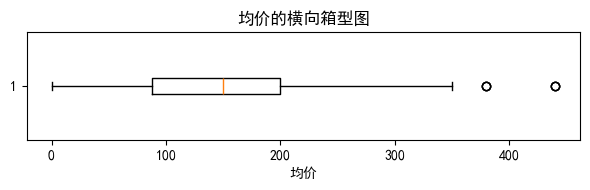

In [22]:
# 对价格绘制横向箱型图
plt.figure(figsize=(6, 2))  # 调整为更适合横向箱型图的比例
plt.boxplot(data['均价'], vert=False)  # vert=False 表示水平方向
plt.title('均价的横向箱型图')
plt.xlabel('均价')
plt.tight_layout()
plt.show()


In [23]:
# 去除异常值
q1 = data['均价'].quantile(0.25)
q3 = data['均价'].quantile(0.75)
iqr = q3 - q1
data = data[~((data['均价'] < (q1 - 1.5 * iqr)) | (data['均价'] > (q3 + 1.5 * iqr)))]

In [24]:
data

,城市名称,包装,品种,日期,产地,物品尺寸,年份,月份,日,星期,均价
0,BALTIMORE,24 inch bins,BIG MACK TYPE,2017-04-29,MARYLAND,lge,2017,4,29,5,275.0
1,BALTIMORE,24 inch bins,BIG MACK TYPE,2017-05-06,MARYLAND,lge,2017,5,6,5,275.0
2,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,DELAWARE,med,2016,9,24,5,160.0
3,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,VIRGINIA,med,2016,9,24,5,160.0
4,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-11-05,MARYLAND,lge,2016,11,5,5,95.0
...,...,...,...,...,...,...,...,...,...,...,...
1698,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,2016-09-30,ILLINOIS,xlge,2016,9,30,4,150.0
1753,ST. LOUIS,36 inch bins,MINIATURE,2016-09-26,MICHIGAN,sml,2016,9,26,0,275.0
1754,ST. LOUIS,36 inch bins,MINIATURE,2016-09-27,MICHIGAN,sml,2016,9,27,1,275.0
1755,ST. LOUIS,36 inch bins,MINIATURE,2016-09-28,MICHIGAN,sml,2016,9,28,2,275.0


# 数据探索
# 自定义任务设定
1. 哪些州的南瓜产量最多？不同地区的生产情况如何？哪些是地区特色/优势？
2. 哪里的南瓜价格最高？
3. 南瓜的大小与价格有何关系？
4. 哪种南瓜最贵？最便宜？
5. 不同月份的南瓜价格如何变化？南瓜市场上的不同类型南瓜数量如何变化？
6. **建立价格预测模型，预测南瓜价格**

>### 1. 哪些州的南瓜产量最多？不同地区的生产情况如何？哪些是地区特色/优势？

=== 问题1: 各州南瓜产量分析 ===
各州南瓜产量排名:
                 产地   产量
0         MICHIGAN  227
1     PENNSYLVANIA  221
2    MASSACHUSETTS  194
3         ILLINOIS  121
4            TEXAS  107
5             OHIO   97
6       CALIFORNIA   84
7           CANADA   76
8         MARYLAND   71
9   NORTH CAROLINA   67
10        VIRGINIA   59
11          MEXICO   45
12      NEW JERSEY   30
13        NEW YORK   26
14        DELAWARE   14
15        MISSOURI    6
16         VERMONT    6
17         INDIANA    6
18         ALABAMA    4
19      NEW MEXICO    3
20      COSTA RICA    3
21         FLORIDA    2
22       TENNESSEE    1


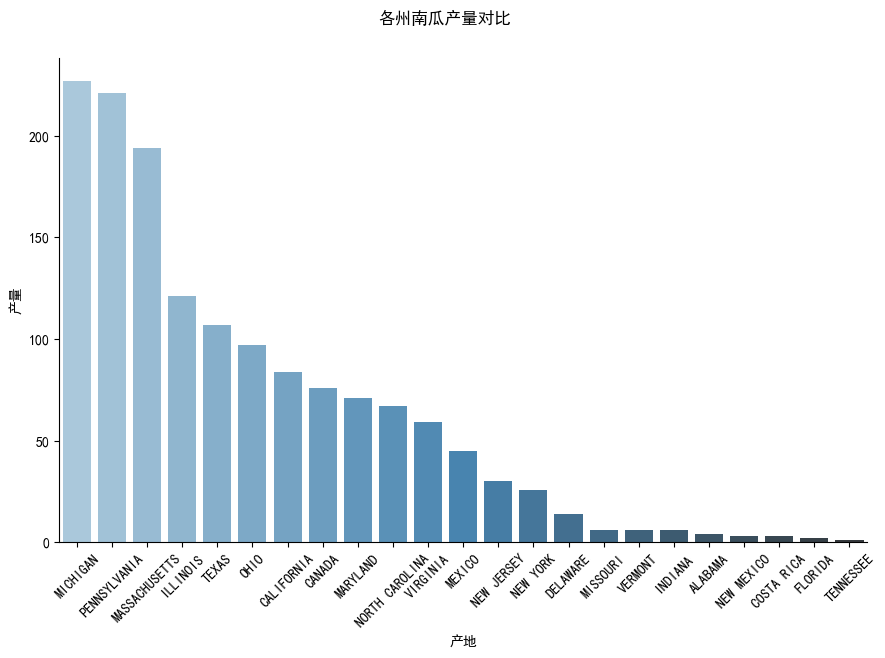

In [25]:
import seaborn as sns

# 问题1: 各州南瓜产量分析
print("=== 问题1: 各州南瓜产量分析 ===")
origin_production = data['产地'].value_counts().reset_index(name='产量')
print("各州南瓜产量排名:\n", origin_production)
g = sns.catplot(x='产地', y='产量', data=origin_production, kind='bar', 
                palette='Blues_d', height=6, aspect=1.5)
g.set_axis_labels("产地", "产量")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('各州南瓜产量对比')
g.savefig('origin_production.png')


>### 2. 哪里的南瓜价格最高？


=== 问题2: 南瓜价格最高地区分析 ===
各城市南瓜均价:
              城市名称          均价
2          BOSTON  174.248563
0         ATLANTA  148.604911
10  SAN FRANCISCO  146.776316
4        COLUMBIA  145.285714
5          DALLAS  144.945736

各产地南瓜均价:
                 产地          均价
10          MEXICO  208.733333
21         VERMONT  194.166667
16  NORTH CAROLINA  168.910448
2           CANADA  167.230263
9    MASSACHUSETTS  165.365979


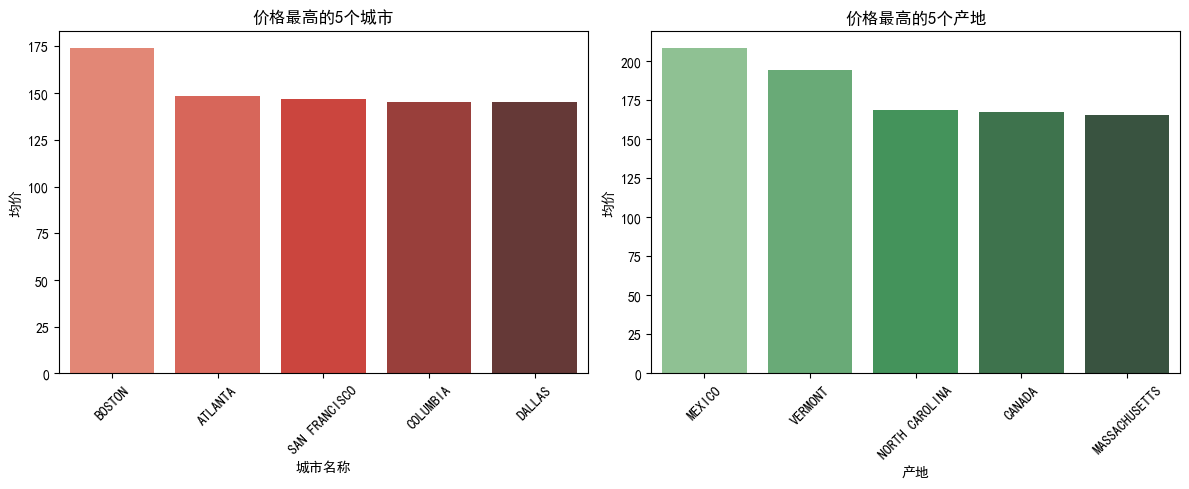

In [26]:

# 问题2: 南瓜价格最高地区分析
print("\n=== 问题2: 南瓜价格最高地区分析 ===")
city_price = data.groupby('城市名称')['均价'].mean().reset_index().sort_values('均价', ascending=False)
origin_price = data.groupby('产地')['均价'].mean().reset_index().sort_values('均价', ascending=False)
print("各城市南瓜均价:\n", city_price.head())
print("\n各产地南瓜均价:\n", origin_price.head())

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x='城市名称', y='均价', data=city_price.head(5), palette='Reds_d', ax=axes[0])
sns.barplot(x='产地', y='均价', data=origin_price.head(5), palette='Greens_d', ax=axes[1])
axes[0].set_title('价格最高的5个城市')
axes[1].set_title('价格最高的5个产地')
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('highest_price.png')


>### 3. 南瓜的大小与价格有何关系？


=== 问题3: 南瓜尺寸与价格关系分析 ===
不同尺寸南瓜的均价:
       物品尺寸          均价
6     xlge  194.983292
4  med-lge  171.782143
1      jbo  161.981299
2      lge  153.733788
0    exjbo  153.235294
3      med  123.980712
5      sml   86.040859


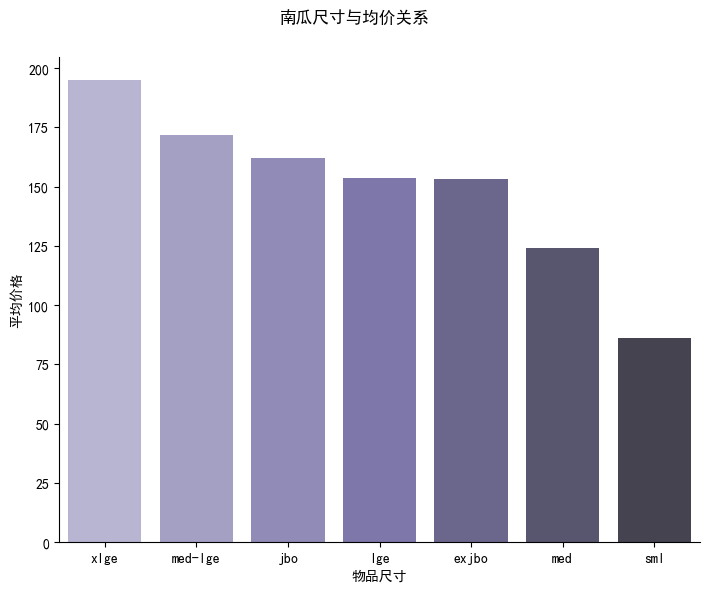

In [27]:

# 问题3: 南瓜尺寸与价格关系分析
print("\n=== 问题3: 南瓜尺寸与价格关系分析 ===")
size_price = data.groupby('物品尺寸')['均价'].mean().reset_index().sort_values('均价', ascending=False)
print("不同尺寸南瓜的均价:\n", size_price)

g = sns.catplot(x='物品尺寸', y='均价', data=size_price, kind='bar', 
                palette='Purples_d', height=6, aspect=1.2)
g.set_axis_labels("物品尺寸", "平均价格")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('南瓜尺寸与均价关系')
g.savefig('size_price_relationship.png')


>### 4. 哪种南瓜最贵？最便宜？


=== 问题4: 南瓜品种价格分析 ===
各品种南瓜均价:
                          品种          均价
1                 BLUE TYPE  226.710526
3                 FAIRYTALE  202.569106
6              KNUCKLE HEAD  194.625000
2                CINDERELLA  163.625333
8  MIXED HEIRLOOM VARIETIES  158.620690
5         HOWDEN WHITE TYPE  152.081633
4               HOWDEN TYPE  150.659954
0             BIG MACK TYPE  148.712500
9                  PIE TYPE  133.211140
7                 MINIATURE   24.603550

最贵的品种: BLUE TYPE, 均价: 226.71
最便宜的品种: MINIATURE, 均价: 24.60


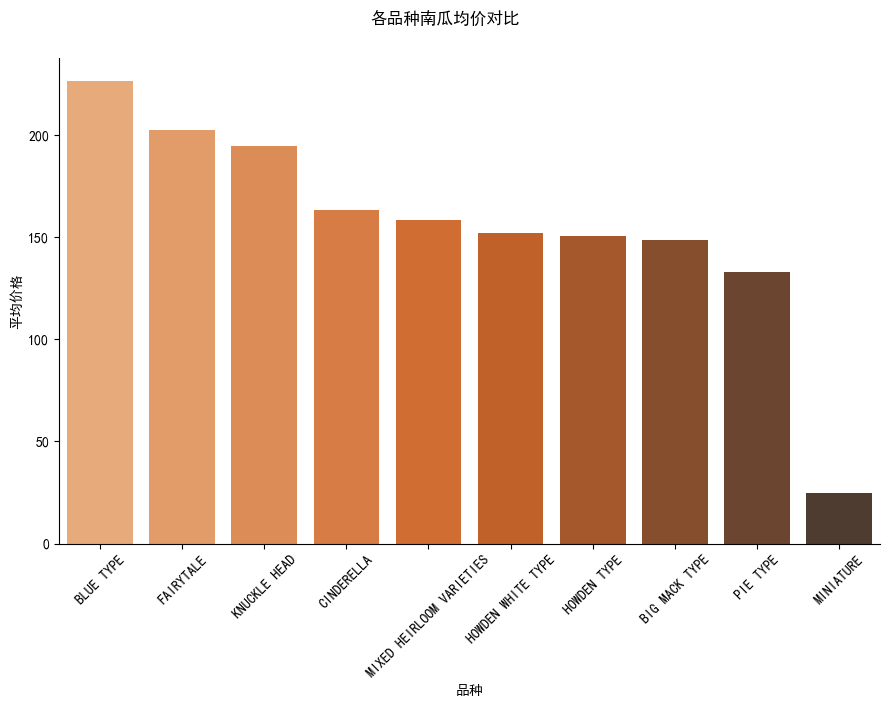

In [28]:

# 问题4: 南瓜品种价格分析
print("\n=== 问题4: 南瓜品种价格分析 ===")
variety_price = data.groupby('品种')['均价'].mean().reset_index().sort_values('均价', ascending=False)
most_expensive = variety_price.iloc[0]
cheapest = variety_price.iloc[-1]
print("各品种南瓜均价:\n", variety_price)
print(f"\n最贵的品种: {most_expensive['品种']}, 均价: {most_expensive['均价']:.2f}")
print(f"最便宜的品种: {cheapest['品种']}, 均价: {cheapest['均价']:.2f}")

g = sns.catplot(x='品种', y='均价', data=variety_price, kind='bar', 
                palette='Oranges_d', height=6, aspect=1.5)
g.set_axis_labels("品种", "平均价格")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('各品种南瓜均价对比')
g.savefig('variety_price_comparison.png')


>### 5. 不同月份的南瓜价格如何变化？南瓜市场上的不同类型南瓜数量如何变化？


=== 问题5: 月份与价格/品种数量关系分析 ===
各月份南瓜均价:
     月份          均价
0    1  185.000000
1    2  216.875000
2    3  210.000000
3    4  220.833333
4    5  233.500000
5    6  225.000000
6    7  252.000000
7    8  125.505882
8    9  143.219179
9   10  137.508279
10  11  115.857026
11  12   92.176471

=== 综合分析结论 ===
1. 产量最多的州: MICHIGAN，产量为227
2. 价格最高的城市: BOSTON，均价为174.25
3. 最贵的南瓜尺寸: xlge，均价为194.98
4. 最贵的南瓜品种: BLUE TYPE，均价为226.71
5. 价格最高的月份: 7.0月，均价为252.00


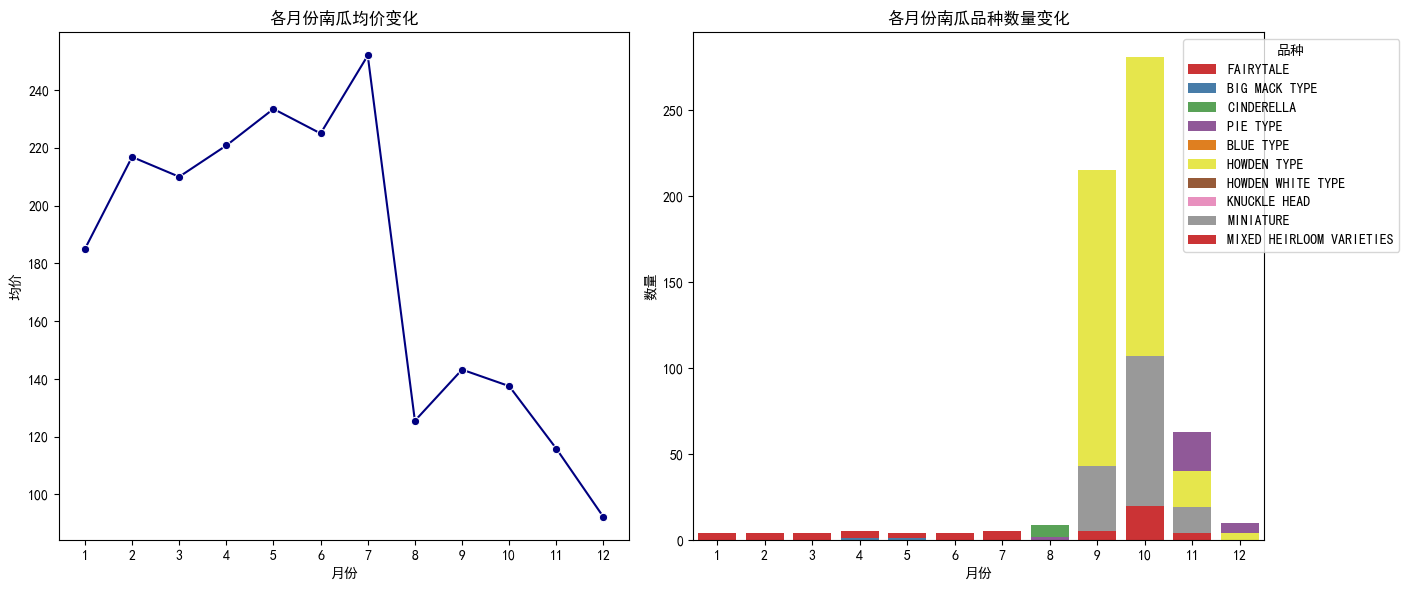

In [29]:

# 问题5: 月份与价格/品种数量关系分析
print("\n=== 问题5: 月份与价格/品种数量关系分析 ===")
monthly_price = data.groupby('月份')['均价'].mean().reset_index()
monthly_variety = data.groupby(['月份', '品种'])['品种'].count().reset_index(name='数量')
print("各月份南瓜均价:\n", monthly_price)

# 创建组合图表
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 左侧: 价格趋势图
sns.lineplot(x='月份', y='均价', data=monthly_price, marker='o', color='navy', ax=axes[0])
axes[0].set_title('各月份南瓜均价变化')
axes[0].set_xticks(monthly_price['月份'])

# 右侧: 品种数量堆叠柱状图
sns.barplot(x='月份', y='数量', hue='品种', data=monthly_variety, 
            palette='Set1', dodge=False, ax=axes[1])
axes[1].set_title('各月份南瓜品种数量变化')
axes[1].legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='品种')
plt.tight_layout()
plt.savefig('monthly_analysis.png')

# 综合结论输出
print("\n=== 综合分析结论 ===")
print(f"1. 产量最多的州: {origin_production.iloc[0]['产地']}，产量为{origin_production.iloc[0]['产量']}")
print(f"2. 价格最高的城市: {city_price.iloc[0]['城市名称']}，均价为{city_price.iloc[0]['均价']:.2f}")
print(f"3. 最贵的南瓜尺寸: {size_price.iloc[0]['物品尺寸']}，均价为{size_price.iloc[0]['均价']:.2f}")
print(f"4. 最贵的南瓜品种: {most_expensive['品种']}，均价为{most_expensive['均价']:.2f}")
print(f"5. 价格最高的月份: {monthly_price.iloc[monthly_price['均价'].idxmax()]['月份']}月，均价为{monthly_price['均价'].max():.2f}")

# 显示所有图表
plt.show()

# 特征选择

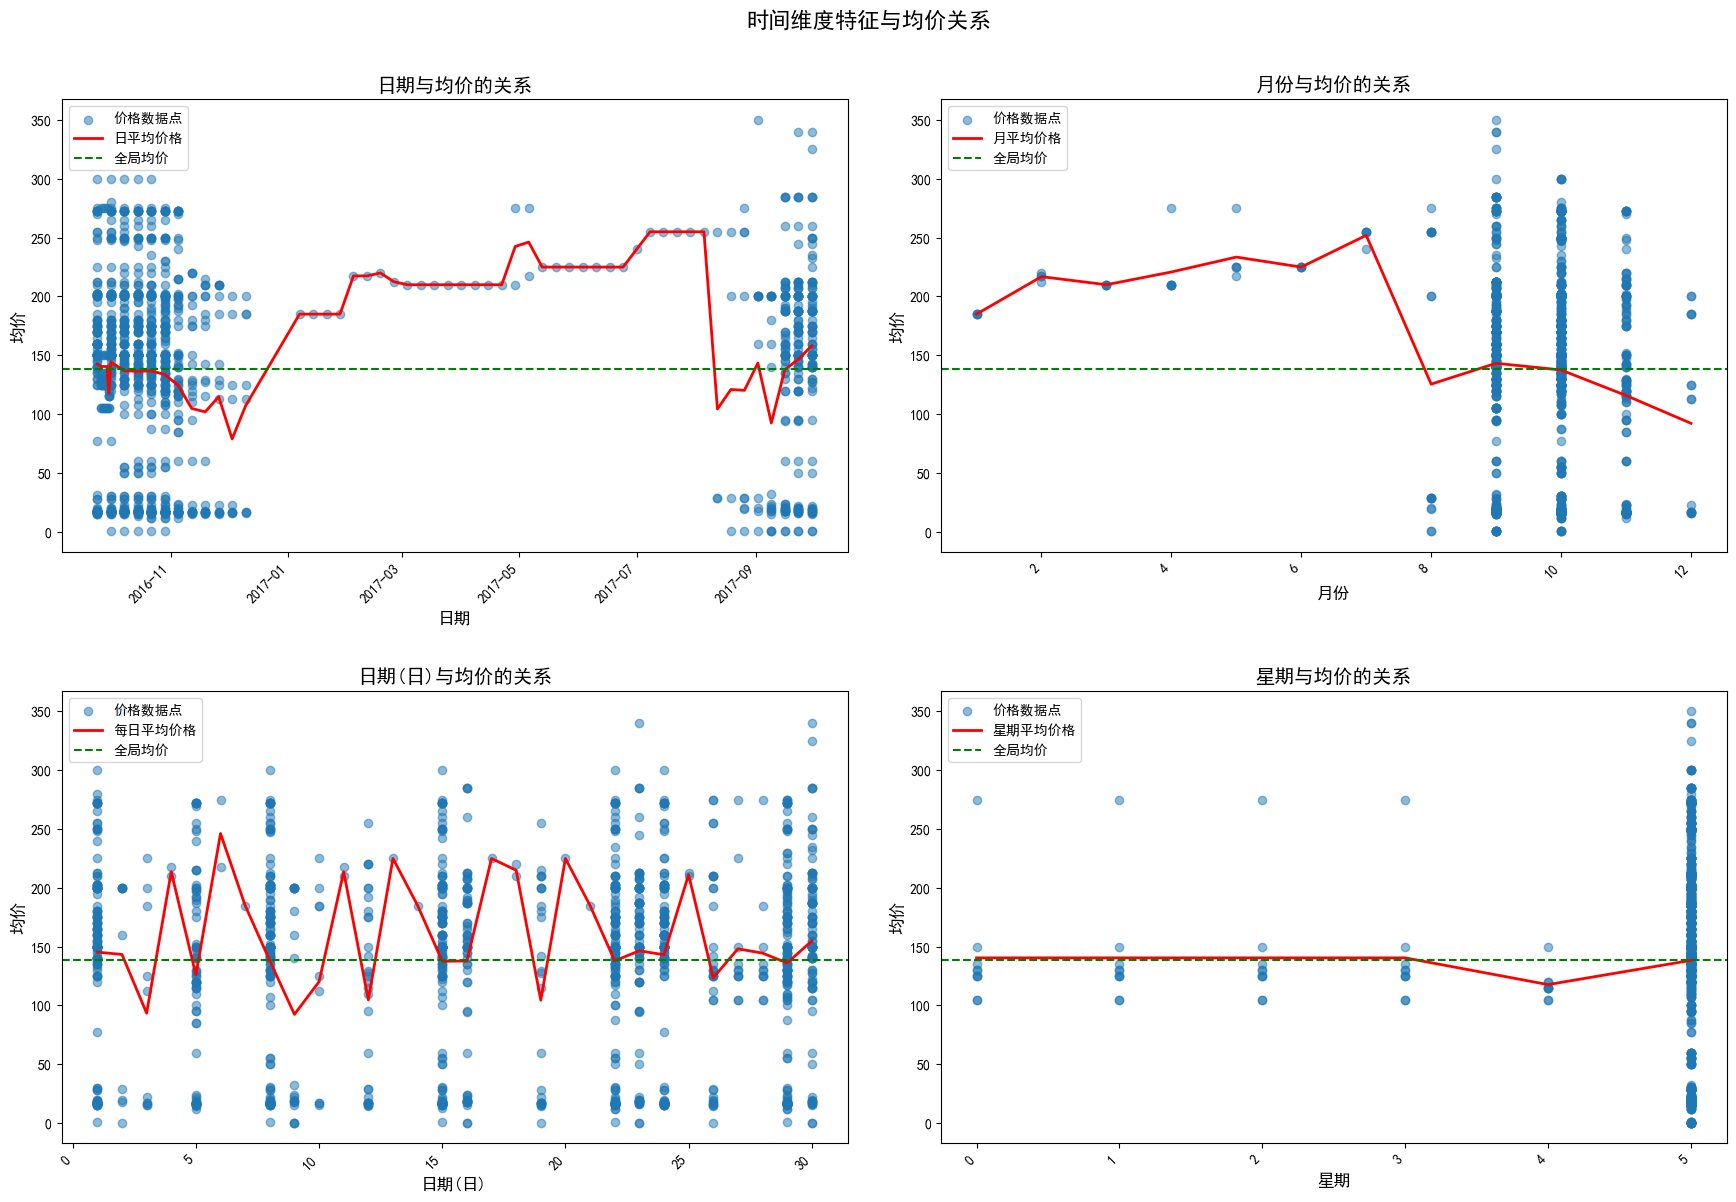

In [30]:
plt.figure(figsize=(18, 12))  # 稍微增大图形以容纳旋转的标签

# 1. 日期与均价 + 均价平均值
plt.subplot(2, 2, 1)
# 散点图展示原始数据
plt.scatter(data['日期'], data['均价'], alpha=0.5, label='价格数据点')
plt.title('日期与均价的关系', fontsize=14)
plt.xlabel('日期', fontsize=12)
plt.ylabel('均价', fontsize=12)
plt.xticks(rotation=45, ha='right')  # 旋转标签并设置合适的对齐方式
# 计算并绘制平均价格线
daily_avg = data.groupby('日期')['均价'].mean()
plt.plot(daily_avg.index, daily_avg, 'r-', linewidth=2, label='日平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')
plt.legend(loc='upper left')

# 2. 月份与均价 + 均价平均值
plt.subplot(2, 2, 2)
plt.scatter(data['月份'], data['均价'], alpha=0.5, label='价格数据点')
plt.title('月份与均价的关系', fontsize=14)
plt.xlabel('月份', fontsize=12)
plt.ylabel('均价', fontsize=12)
plt.xticks(rotation=45, ha='right')
monthly_avg = data.groupby('月份')['均价'].mean()
plt.plot(monthly_avg.index, monthly_avg, 'r-', linewidth=2, label='月平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')

plt.legend(loc='upper left')

# 3. 日与均价 + 均价平均值
plt.subplot(2, 2, 3)
plt.scatter(data['日'], data['均价'], alpha=0.5, label='价格数据点')
plt.title('日期(日)与均价的关系', fontsize=14)
plt.xlabel('日期(日)', fontsize=12)
plt.ylabel('均价', fontsize=12)
plt.xticks(rotation=45, ha='right')
day_avg = data.groupby('日')['均价'].mean()
plt.plot(day_avg.index, day_avg, 'r-', linewidth=2, label='每日平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')
plt.legend(loc='upper left')

# 4. 星期与均价 + 均价平均值
plt.subplot(2, 2, 4)
plt.scatter(data['星期'], data['均价'], alpha=0.5, label='价格数据点')
plt.title('星期与均价的关系', fontsize=14)
plt.xlabel('星期', fontsize=12)
plt.ylabel('均价', fontsize=12)
plt.xticks(rotation=45, ha='right')
weekday_avg = data.groupby('星期')['均价'].mean()
plt.plot(weekday_avg.index, weekday_avg, 'r-', linewidth=2, label='星期平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')

plt.legend(loc='upper left')

plt.tight_layout(pad=3.0)  # 调整子图之间的间距，为标签留出足够空间
plt.suptitle('时间维度特征与均价关系', fontsize=16, y=1.02)
plt.show()

从上图可见均价存在月分和星期在记录数量上存在明显的周期性变化，可能原因有两个：1.月份涉及季节变化，受到生长周期影响；2.星期可能涉及工作日影响记录数量  
在价格波动上，也存在明显的周期性变化，可能原因：1.季节和产值变化导致价格波动 2.星期5的价格降低，可能涉及周末降价促销等

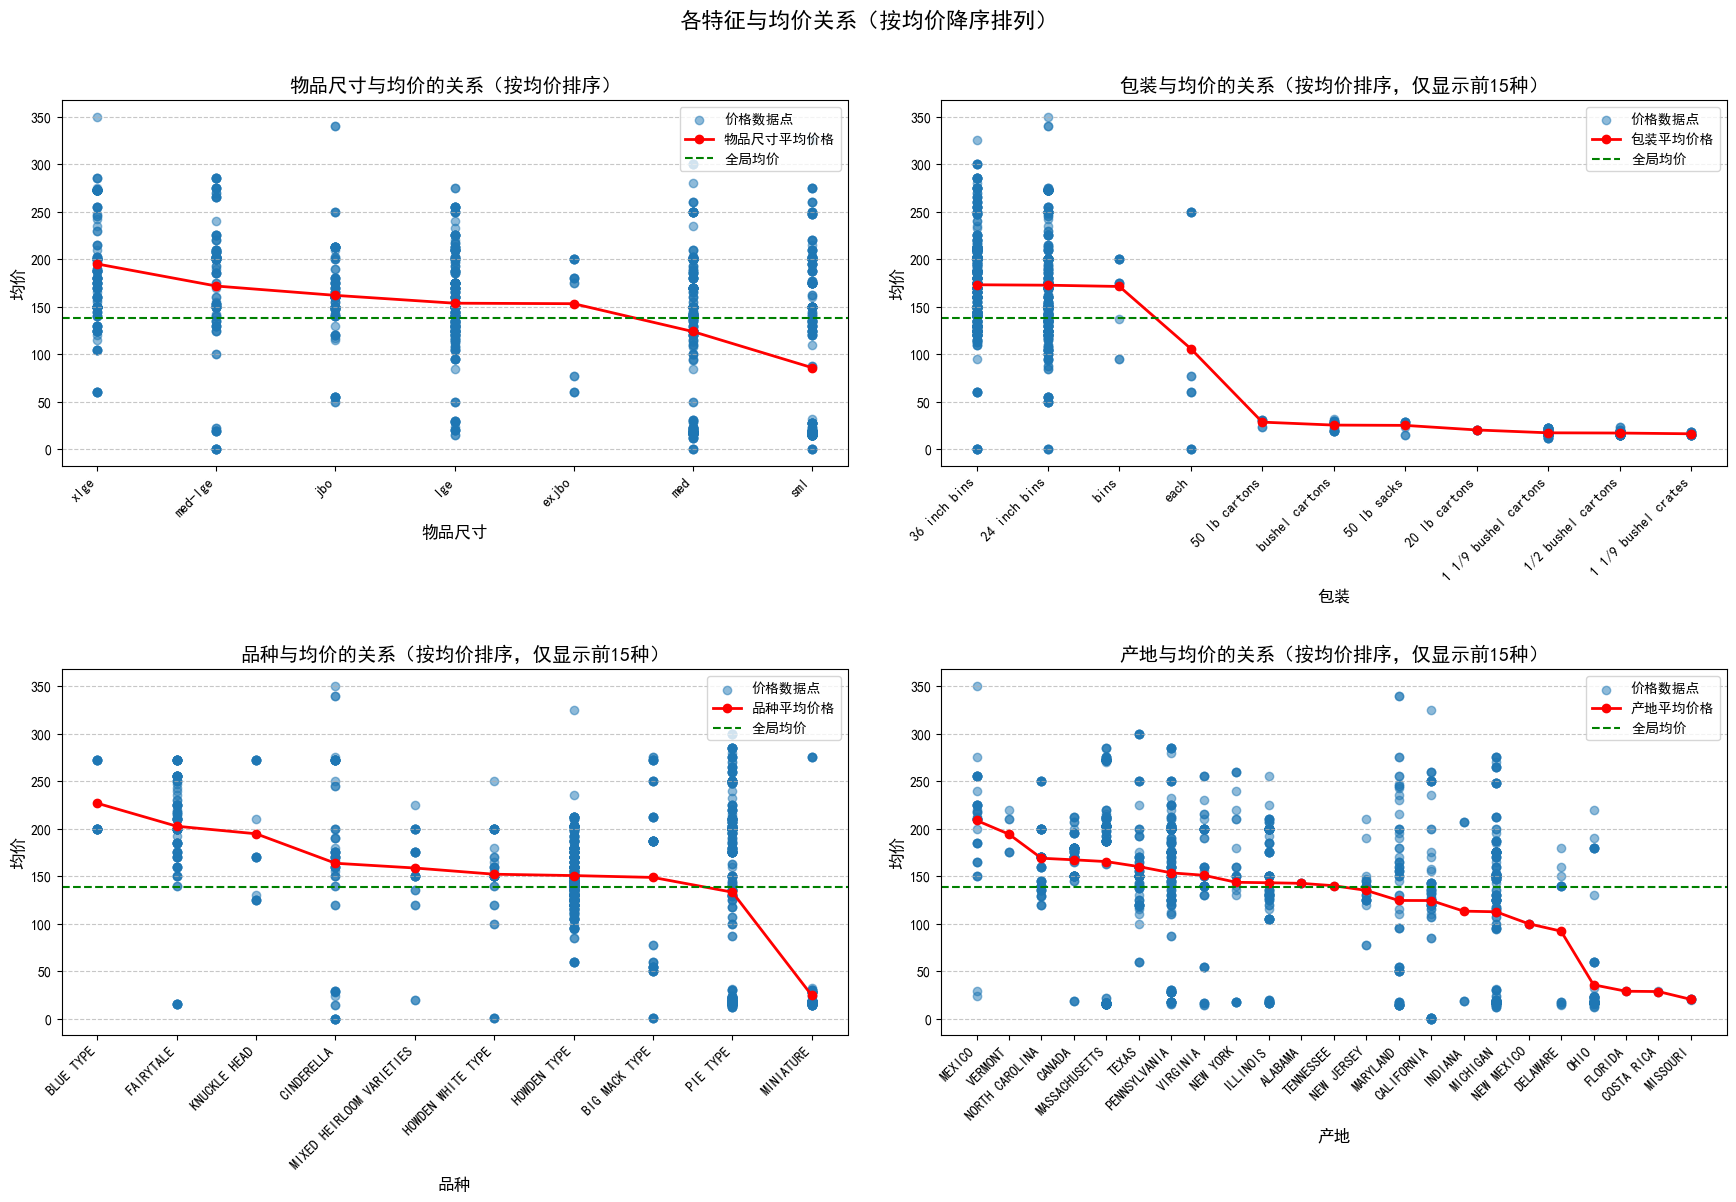

In [31]:
# 绘制各特征与均价关系图
plt.figure(figsize=(18, 12))  # 稍微增大图形以容纳旋转的标签
# 1. 物品尺寸与均价 + 均价平均值
plt.subplot(2, 2, 1)
# 计算每个物品尺寸的均价并排序
size_avg = data.groupby('物品尺寸')['均价'].mean().sort_values(ascending=False)
size_order = size_avg.index  # 获取排序后的物品尺寸顺序
# 创建映射字典，用于对原始数据中的物品尺寸进行排序
size_map = {size: i for i, size in enumerate(size_order)}
size_positions = [size_map.get(s, -1) for s in data['物品尺寸']]  # 获取排序后的位置
# 散点图展示原始数据（按均价排序后的位置）
plt.scatter(size_positions, data['均价'], alpha=0.5, label='价格数据点')
plt.title('物品尺寸与均价的关系（按均价排序）', fontsize=14)
plt.xlabel('物品尺寸', fontsize=12)
plt.ylabel('均价', fontsize=12)
plt.xticks(range(len(size_order)), size_order, rotation=45, ha='right')# 设置x轴刻度标签
# 添加平均值线
positions = np.arange(len(size_avg))
plt.plot(positions, size_avg.values, 'r-o', linewidth=2, label='物品尺寸平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. 包装与均价 + 均价平均值
plt.subplot(2, 2, 2)
top_packaging = data['包装'].value_counts().index
filtered_data = data[data['包装'].isin(top_packaging)]
package_avg = filtered_data.groupby('包装')['均价'].mean().sort_values(ascending=False)
package_order = package_avg.index
package_map = {pkg: i for i, pkg in enumerate(package_order)}
filtered_positions = [package_map.get(p, -1) for p in filtered_data['包装']]
plt.scatter(filtered_positions, filtered_data['均价'], alpha=0.5, label='价格数据点')
plt.title('包装与均价的关系（按均价排序，仅显示前15种）', fontsize=14)
plt.xlabel('包装', fontsize=12)
plt.ylabel('均价', fontsize=12)

plt.xticks(range(len(package_order)), package_order, rotation=45, ha='right')# 设置x轴刻度标签
positions = np.arange(len(package_avg))
plt.plot(positions, package_avg.values, 'r-o', linewidth=2, label='包装平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')

plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. 品种与均价 + 均价平均值
plt.subplot(2, 2, 3)
top_varieties = data['品种'].value_counts().index
filtered_data = data[data['品种'].isin(top_varieties)]
variety_avg = filtered_data.groupby('品种')['均价'].mean().sort_values(ascending=False)
variety_order = variety_avg.index
variety_map = {var: i for i, var in enumerate(variety_order)}
filtered_positions = [variety_map.get(v, -1) for v in filtered_data['品种']]
plt.scatter(filtered_positions, filtered_data['均价'], alpha=0.5, label='价格数据点')
plt.title('品种与均价的关系（按均价排序，仅显示前15种）', fontsize=14)
plt.xlabel('品种', fontsize=12)
plt.ylabel('均价', fontsize=12)
plt.xticks(range(len(variety_order)), variety_order, rotation=45, ha='right')
positions = np.arange(len(variety_avg))
plt.plot(positions, variety_avg.values, 'r-o', linewidth=2, label='品种平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 4. 产地与均价 + 均价平均值
plt.subplot(2, 2, 4)
top_origins = data['产地'].value_counts().index
filtered_data = data[data['产地'].isin(top_origins)]
origin_avg = filtered_data.groupby('产地')['均价'].mean().sort_values(ascending=False)
origin_order = origin_avg.index
origin_map = {org: i for i, org in enumerate(origin_order)}
filtered_positions = [origin_map.get(o, -1) for o in filtered_data['产地']]
plt.scatter(filtered_positions, filtered_data['均价'], alpha=0.5, label='价格数据点')
plt.title('产地与均价的关系（按均价排序，仅显示前15种）', fontsize=14)
plt.xlabel('产地', fontsize=12)
plt.ylabel('均价', fontsize=12)
plt.xticks(range(len(origin_order)), origin_order, rotation=45, ha='right')
positions = np.arange(len(origin_avg))
plt.plot(positions, origin_avg.values, 'r-o', linewidth=2, label='产地平均价格')
plt.axhline(y=data['均价'].mean(), color='g', linestyle='--', label='全局均价')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=3.0)  # 调整子图之间的间距，为标签留出足够空间
plt.suptitle('各特征与均价关系（按均价降序排列）', fontsize=16, y=1.02)
plt.show()


从散点图和折线图可以看出，各特征与均价存在一定的关系，如均值不同，价格上下限不同

In [32]:
from sklearn.model_selection import train_test_split
# 特征选取
data = data[[ '月份', '星期', '物品尺寸', '包装', '品种', '产地', '均价']]
# 对字符型特征进行编码
data = pd.get_dummies(data, columns=['物品尺寸', '包装', '品种', '产地'], drop_first=True)

# 划分数据集
X = data.drop('均价', axis=1)
y = data['均价']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data

,月份,星期,均价,物品尺寸_jbo,物品尺寸_lge,物品尺寸_med,物品尺寸_med-lge,物品尺寸_sml,物品尺寸_xlge,包装_1 1/9 bushel crates,...,产地_NEW JERSEY,产地_NEW MEXICO,产地_NEW YORK,产地_NORTH CAROLINA,产地_OHIO,产地_PENNSYLVANIA,产地_TENNESSEE,产地_TEXAS,产地_VERMONT,产地_VIRGINIA
0,4,5,275.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5,5,275.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9,5,160.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9,5,160.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,11,5,95.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,9,4,150.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1753,9,0,275.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1754,9,1,275.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1755,9,2,275.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# 模型训练和评估

模型: LinearRegression
训练集上的评估指标:
均方误差 (MSE): 1137.341860549847
平均绝对误差 (MAE): 21.604852145474418
决定系数 (R²): 0.8159078129230352
 - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * - 
测试集上的评估指标:
均方误差 (MSE): 1401.2705047562652
平均绝对误差 (MAE): 23.312631957901967
决定系数 (R²): 0.7874107105224332
模型: Ridge
训练集上的评估指标:
均方误差 (MSE): 1137.5879782160114
平均绝对误差 (MAE): 21.591797681464154
决定系数 (R²): 0.8158679758775398
 - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * - 
测试集上的评估指标:
均方误差 (MSE): 1401.7513885358064
平均绝对误差 (MAE): 23.308163084223526
决定系数 (R²): 0.7873377547721573
模型: Lasso
训练集上的评估指标:
均方误差 (MSE): 1277.1347774913163
平均绝对误差 (MAE): 23.484817619124826
决定系数 (R²): 0.7932806814419323
 - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * - 
测试集上的评估指标:
均方误差 (MSE): 1534.4704958071695
平均绝对误差 (MAE): 25.218942696412675
决定系数 (R²): 0.7672026983222082
模型: RandomForestRegressor
训练集上的评估指标:
均方误差 (MSE): 199.29088307824915
平均绝对误差 (MAE): 6.031939650487942
决定系数 (R²): 0.9677

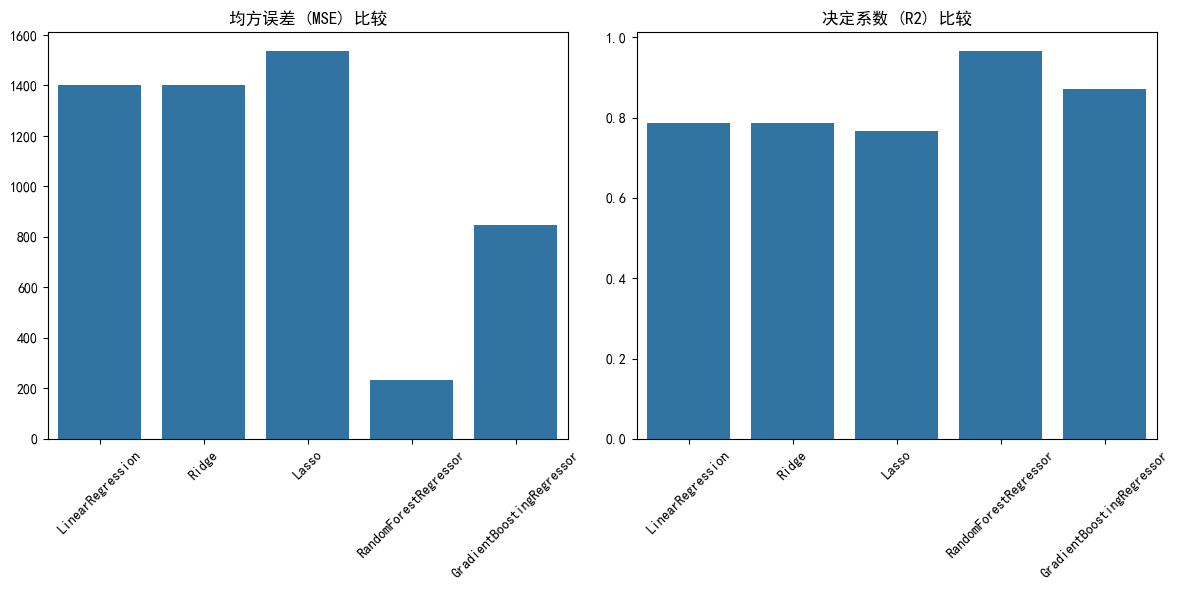

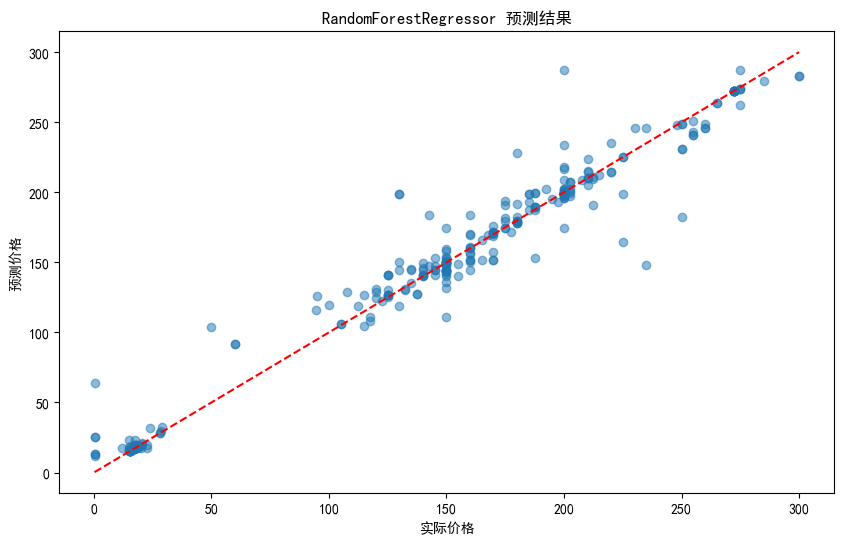

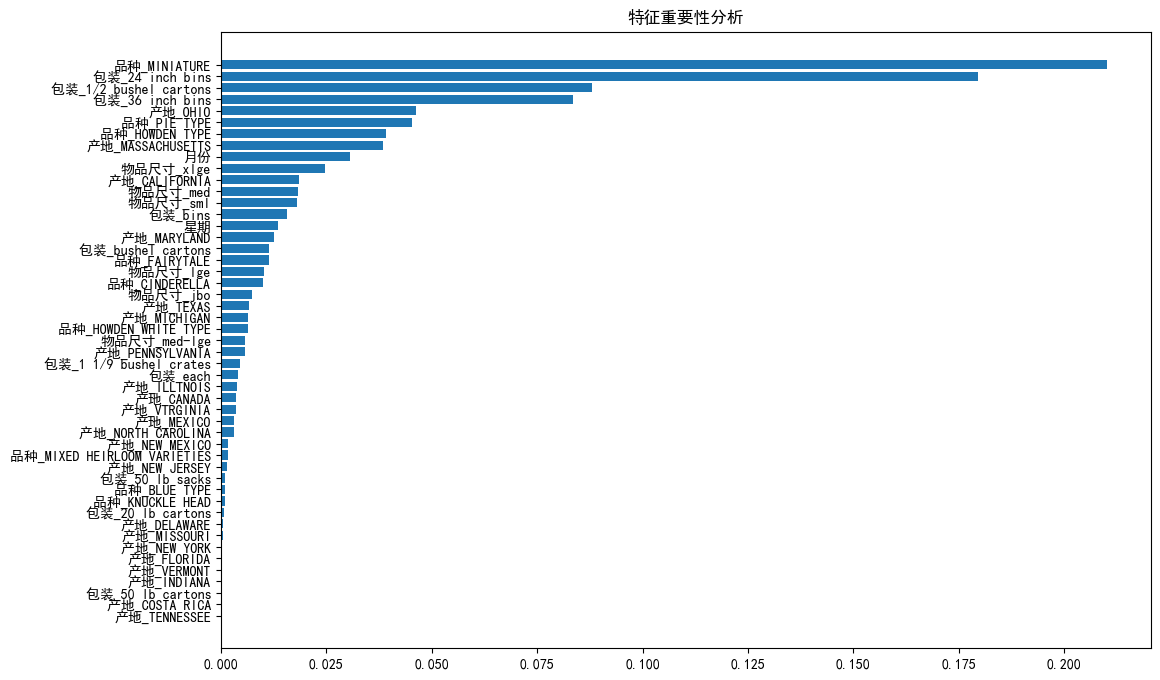

In [33]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义评估函数
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # 使用训练集训练模型
    model.fit(X_train, y_train)
    print(f"模型: {type(model).__name__}")
    print('训练集上的评估指标:')
    print(f"均方误差 (MSE): {mean_squared_error(y_train, model.predict(X_train))}")
    print(f"平均绝对误差 (MAE): {mean_absolute_error(y_train, model.predict(X_train))}")
    print(f"决定系数 (R²): {r2_score(y_train, model.predict(X_train)):}")
    print(" - * - " * 10)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    print("测试集上的评估指标:")
    print(f"均方误差 (MSE): {mse}")
    print(f"平均绝对误差 (MAE): {mae}")
    print(f"决定系数 (R²): {r2}")
    print("==" * 50)
    
    return y_pred, {'MSE': mse, 'MAE': mae, 'R²': r2}


# 定义要评估的模型
models = [
    LinearRegression(),# 线性回归
    Ridge(),# 岭回归
    Lasso(),# Lasso回归
    RandomForestRegressor(),# 随机森林回归-n_estimators参数指定树的数量
    GradientBoostingRegressor()# 梯度提升回归
]

# 评估所有模型
results = {}
for model in models:
    y_pred, metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[type(model).__name__] = metrics

# 找出表现最好的模型
best_model = min(results.items(), key=lambda x: x[1]['MSE'])[0]
print(f"表现最好的模型: {best_model}")

# 可视化不同模型的性能比较
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(results.keys()), y=[r['MSE'] for r in results.values()])
plt.title('均方误差 (MSE) 比较')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=list(results.keys()), y=[r['R²'] for r in results.values()])
plt.title('决定系数 (R2) 比较')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 可视化最佳模型的预测结果
best_model_instance = None
for model in models:
    if type(model).__name__ == best_model:
        best_model_instance = model
        break

if best_model_instance:
    y_pred_best = best_model_instance.predict(X_test_scaled)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_best, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('实际价格')
    plt.ylabel('预测价格')
    plt.title(f'{best_model} 预测结果')
    plt.show()

    # 特征重要性分析 (如果模型支持)
    if hasattr(best_model_instance, 'feature_importances_'):
        plt.figure(figsize=(12, 8))
        feature_importance = best_model_instance.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + 0.5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(X.columns)[sorted_idx])
        plt.title('特征重要性分析')
        plt.show()

简单训练几个模型，发现随机森林回归表现最好，可以使用随机森林回归模型进行预测辅助决策

# 模型超参寻找和优化

In [ ]:
# 寻找所有模型的最佳参数
from sklearn.model_selection import GridSearchCV
# 定义参数网格
param_grid = {
    'LinearRegression': {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [-1]},
    'Ridge': {'alpha': [0.1, 1.0, 10.0], 'fit_intercept': [True, False], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'], 'max_iter': [None, 1000, 2000]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0], 'fit_intercept': [True, False], 'selection': ['cyclic', 'random'], 'max_iter': [1000, 2000]},
    'RandomForestRegressor': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},# n_estimators参数指定树的数量;max_depth参数指定树的最大深度;min_samples_split参数指定内部节点再划分所需的最小样本数;min_samples_leaf参数指定叶子节点所需的最小样本数
    'GradientBoostingRegressor': {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 1.0],'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}#learning_rate参数指定学习率;max_depth参数指定树的最大深度;min_samples_split参数指定内部节点再划分所需的最小样本数
}
# 创建模型字典
models = {
    'LinearRegression': LinearRegression,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'RandomForestRegressor': RandomForestRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor
}
# 寻找最佳参数
best_params = {}
for model_name, params in param_grid.items():
    model = models[model_name]()
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='r2')#cv参数指定交叉验证的折数;scoring参数指定关注的评估指标-neg_mean_squared_error表示均方误差的负值、r2表示决定系数
    grid_search.fit(X_train_scaled, y_train)
    best_params[model_name] = grid_search.best_params_
print("最佳参数:")
print(best_params)

最佳参数:
{'LinearRegression': {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}, 'Ridge': {'alpha': 1.0, 'fit_intercept': True, 'max_iter': None, 'solver': 'sparse_cg'}, 'Lasso': {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'selection': 'cyclic'}, 'RandomForestRegressor': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, 'GradientBoostingRegressor': {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}}


In [ ]:
# neg_mean_squared_error表示均方误差负值最佳的参数:
# {'LinearRegression': {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}, 'Ridge': {'alpha': 1.0, 'fit_intercept': True, 'max_iter': None, 'solver': 'sparse_cg'}, 'Lasso': {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'selection': 'cyclic'}, 'RandomForestRegressor': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, 'GradientBoostingRegressor': {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}}


In [ ]:
# 使用最佳参数的各模型
models = [
    LinearRegression(**best_params['LinearRegression']),  # 线性回归
    Ridge(**best_params['Ridge']),  # 岭回归
    Lasso(**best_params['Lasso']),  # Lasso回归
    RandomForestRegressor(**best_params['RandomForestRegressor']),  # 随机森林回归
    GradientBoostingRegressor(**best_params['GradientBoostingRegressor'])  # 梯度提升回归
]

模型: LinearRegression
训练集上的评估指标:
均方误差 (MSE): 1137.341860549847
平均绝对误差 (MAE): 21.604852145474418
决定系数 (R²): 0.8159078129230352
 - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * - 
测试集上的评估指标:
均方误差 (MSE): 1401.2705047562652
平均绝对误差 (MAE): 23.312631957901967
决定系数 (R²): 0.7874107105224332
模型: Ridge
训练集上的评估指标:
均方误差 (MSE): 1137.5880875735165
平均绝对误差 (MAE): 21.59181662979021
决定系数 (R²): 0.8158679581767385
 - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * - 
测试集上的评估指标:
均方误差 (MSE): 1401.8235753487477
平均绝对误差 (MAE): 23.30859853445887
决定系数 (R²): 0.7873268031798553
模型: Lasso
训练集上的评估指标:
均方误差 (MSE): 1141.8919213673407
平均绝对误差 (MAE): 21.659719302252643
决定系数 (R²): 0.8151713319437625
 - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * -  - * - 
测试集上的评估指标:
均方误差 (MSE): 1393.7768207077195
平均绝对误差 (MAE): 23.17845047327493
决定系数 (R²): 0.7885475909192177
模型: RandomForestRegressor
训练集上的评估指标:
均方误差 (MSE): 207.78080270096603
平均绝对误差 (MAE): 6.077254375436221
决定系数 (R²): 0.9663682

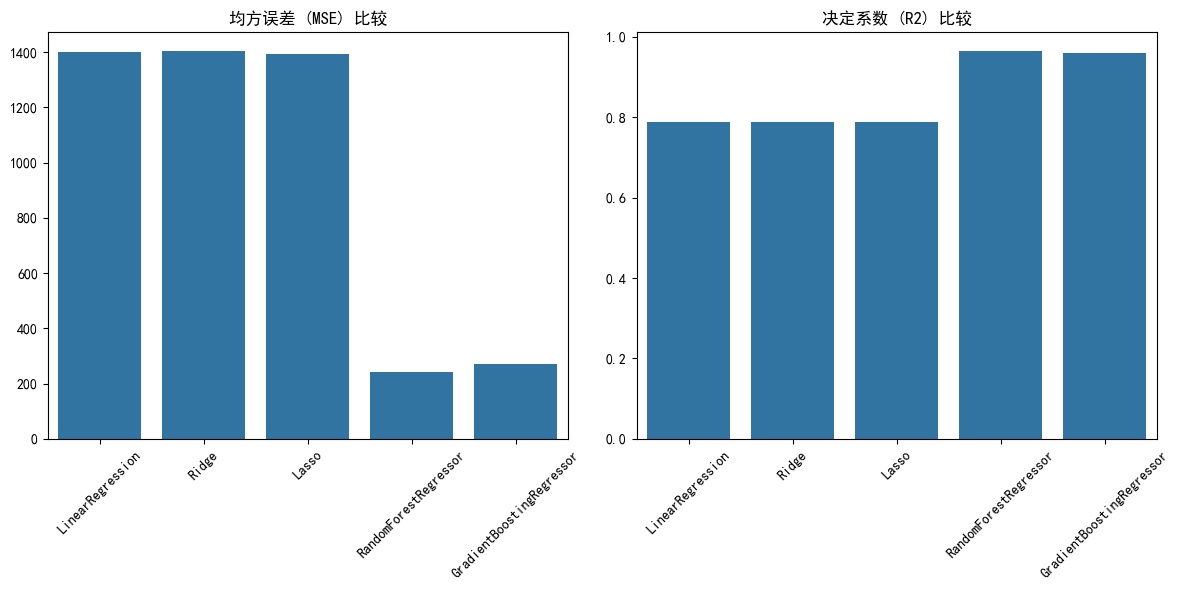

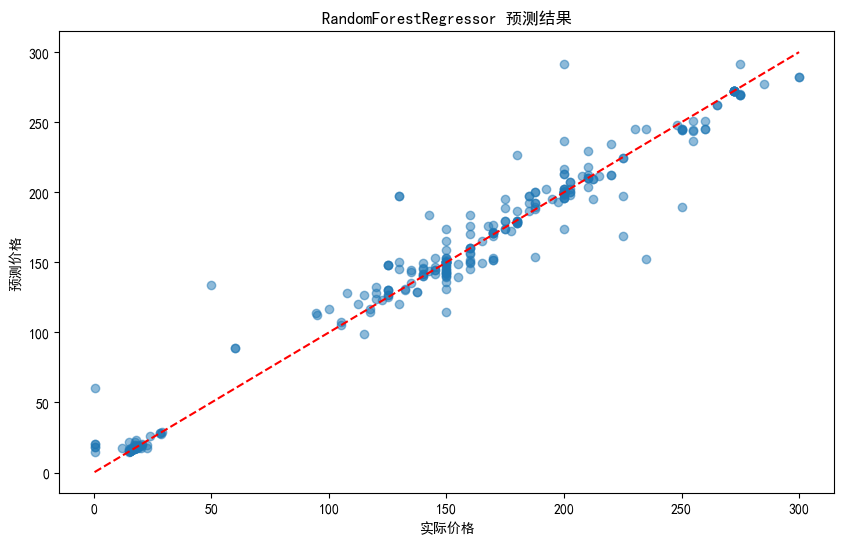

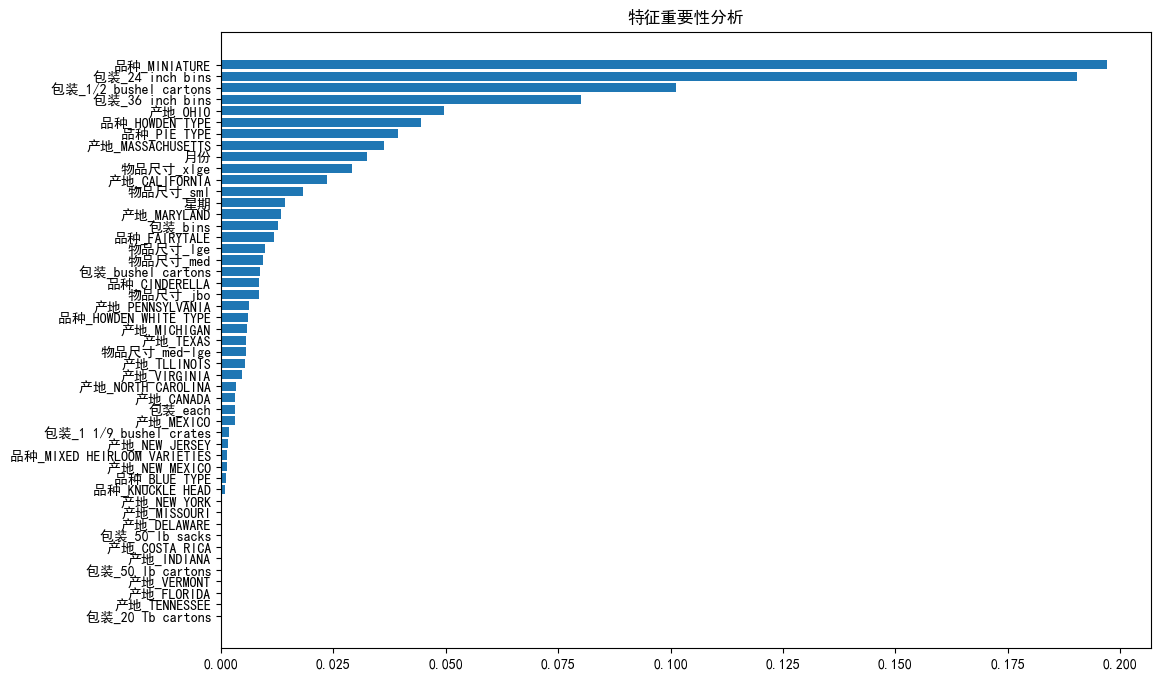

In [ ]:

# 评估所有模型
results = {}
for model in models:
    y_pred, metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[type(model).__name__] = metrics

# 找出表现最好的模型
best_model = min(results.items(), key=lambda x: x[1]['MSE'])[0]
print(f"表现最好的模型: {best_model}")

# 可视化不同模型的性能比较
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(results.keys()), y=[r['MSE'] for r in results.values()])
plt.title('均方误差 (MSE) 比较')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=list(results.keys()), y=[r['R²'] for r in results.values()])
plt.title('决定系数 (R2) 比较')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 可视化最佳模型的预测结果
best_model_instance = None
for model in models:
    if type(model).__name__ == best_model:
        best_model_instance = model
        break

if best_model_instance:
    y_pred_best = best_model_instance.predict(X_test_scaled)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_best, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('实际价格')
    plt.ylabel('预测价格')
    plt.title(f'{best_model} 预测结果')
    plt.show()

    # 特征重要性分析 (如果模型支持)
    if hasattr(best_model_instance, 'feature_importances_'):
        plt.figure(figsize=(12, 8))
        feature_importance = best_model_instance.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + 0.5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(X.columns)[sorted_idx])
        plt.title('特征重要性分析')
        plt.show()

### 模型调参前后性能对比分析


| 模型                     | 参数状态   | 训练集MSE | 训练集R²   | 测试集MSE | 测试集R²   | 测试集MAE |
|--------------------------|------------|-----------|------------|-----------|------------|-----------|
| **RandomForestRegressor**| 默认参数   | 201.19    | 0.9674     | **256.25**| **0.9611** | 7.97      |
|                          | **调参后** | **207.78**| **0.9664** | **240.14**| **0.9636** | **7.82**  |
| GradientBoostingRegressor| 默认参数   | 766.62    | 0.8759     | 884.88    | 0.8658     | 20.64     |
|                          | **调参后** | **177.59**| **0.9713** | **270.11**| **0.9590** | **7.52**  |
| Lasso                    | 默认参数   | 1277.13   | 0.7933     | 1534.47   | 0.7672     | 25.22     |
|                          | **调参后** | **1141.89**| **0.8152**| **1393.78**| **0.7885**| **23.18**|
| LinearRegression         | 默认参数   | 1137.34   | 0.8159     | 1401.27   | 0.7874     | 23.31     |
|                          | 调参后     | 1137.34   | 0.8159     | 1401.27   | 0.7874     | 23.31     |
| Ridge                    | 默认参数   | 1137.59   | 0.8159     | 1401.75   | 0.7873     | 23.31     |
|                          | 调参后     | 1137.59   | 0.8159     | 1401.82   | 0.7873     | 23.31     |

### 关键观察结论
1. **随机森林持续最优**：
   - 调参后测试集MSE从256.25 → 240.14（**↓6.3%**）
   - R²从0.9611 → 0.9636（↑0.25个百分点）
   - 在保持最佳泛化能力的同时性能进一步提升
2. **梯度提升树显著提升**：
   - 调参后测试集MSE从884.88 → 270.11（**↓69.5%**）
   - R²从0.8658 → 0.9590（↑9.32个百分点）
   - 从表现最差的树模型跃升至接近随机森林水平
3. **Lasso回归改进明显**：
   - 测试集MSE下降9.2%（1534.47 → 1393.78）
   - 解决了默认参数下的严重欠拟合问题
4. **线性模型无变化**：
   - LinearRegression和Ridge的参数调整未带来改进
   - 表明其默认参数已接近最优配置
----
### 最佳模型推荐
**RandomForestRegressor** 在调参后保持最佳泛化性能：
```python
最优参数配置 = {'max_depth': None,'min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 50}
```
**测试集关键指标**：
- MSE = 240.14（所有模型中最低）
- R² = 0.9636（预测能力最强）
- MAE = 7.82（平均误差最小）
> 建议优先部署随机森林模型，梯度提升树作为备选方案（测试集MAE=7.52表现亮眼，但泛化能力稍弱于随机森林）。线性模型族在本任务中表现显著弱于树模型。